In [46]:
!pip install tensorboard pandas
!pip install matplotlib seaborn
!pip install tensorflow

^C
ERROR: Operation cancelled by user


In [ ]:
import os

In [ ]:
path = '/home/asap7772/highway-env/data'
lst = []
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
      x = os.path.join(root, name)
      if 'tfevents' in x:
        lst.append(x)
        print('added: ', x)

added:  /home/asap7772/highway-env/data/cnn_roundabout/DQN_1/events.out.tfevents.1649708004.deepthought.39167.0
added:  /home/asap7772/highway-env/data/cnn_merge/DQN_1/events.out.tfevents.1649707999.deepthought.39065.0
added:  /home/asap7772/highway-env/data/cnn_intersection/DQN_1/events.out.tfevents.1649708013.deepthought.39267.0
added:  /home/asap7772/highway-env/data/cnn_highway/DQN_1/events.out.tfevents.1649707993.deepthought.38961.0


# Plotting TensorBoard

In [ ]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [ ]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.8.0


In [ ]:
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict

def plot_tensorboard(path, prefix=''):
    data = defaultdict(list)
    for e in summary_iterator(path):
        for v in e.summary.value:
            data[v.tag].append(v.simple_value)
    
    # Plot the dataframe
    for col in data:
        plt.figure()
        plt.plot(data[col])
        plt.title(prefix + col)
        plt.show()
    

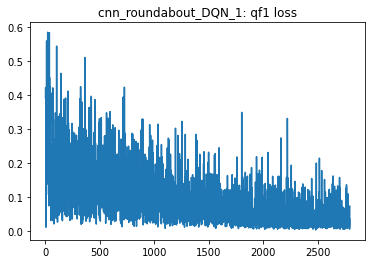

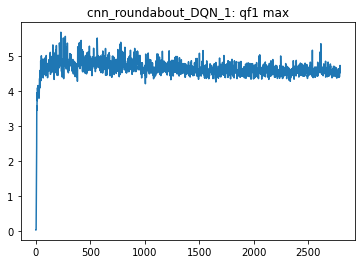

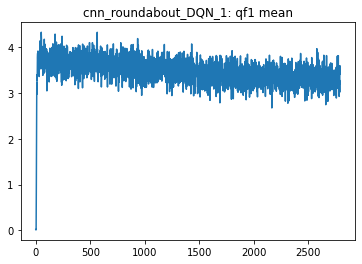

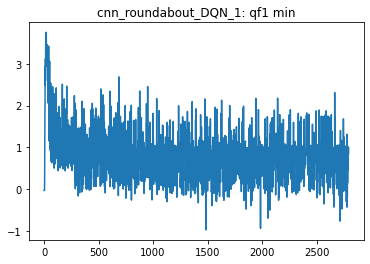

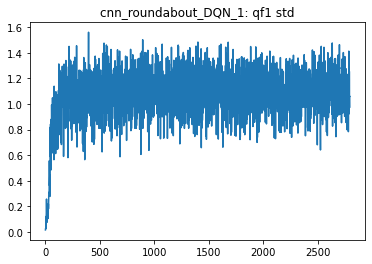

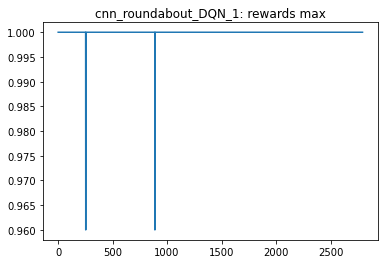

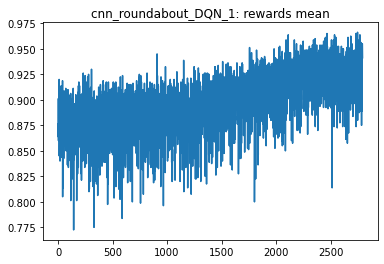

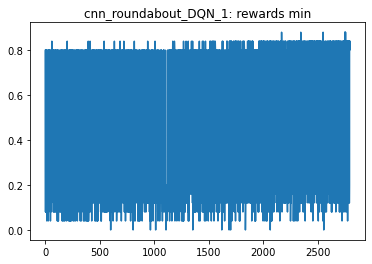

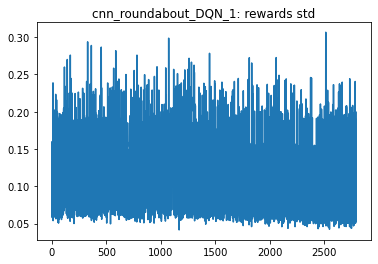

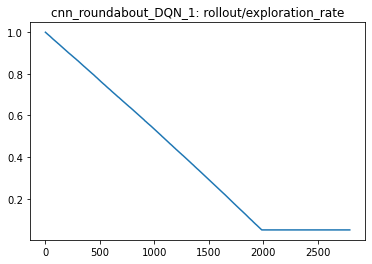

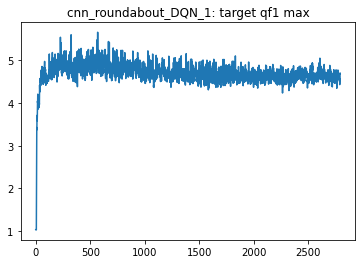

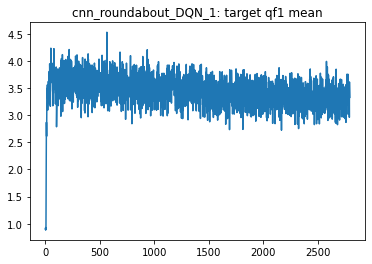

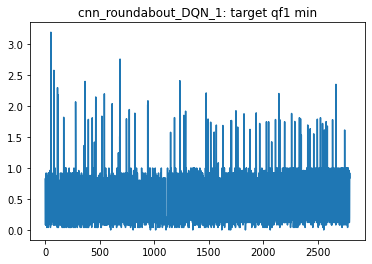

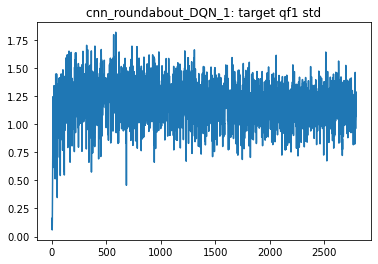

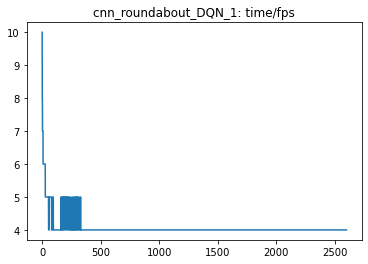

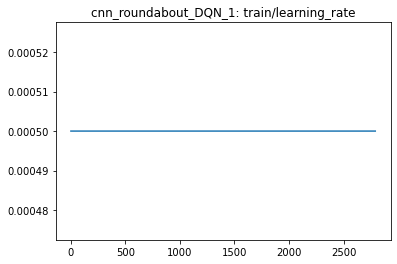

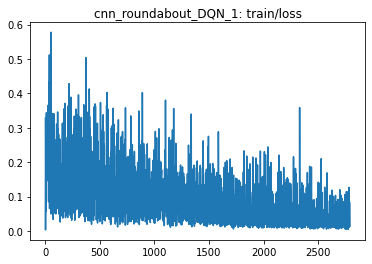

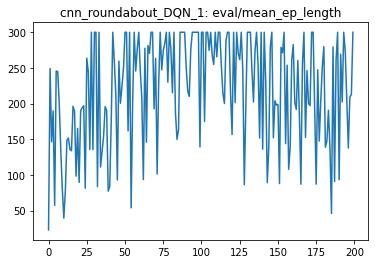

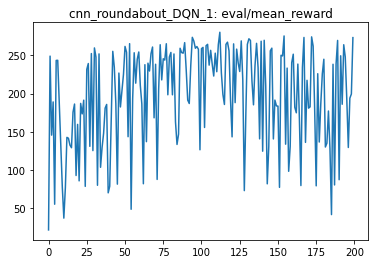

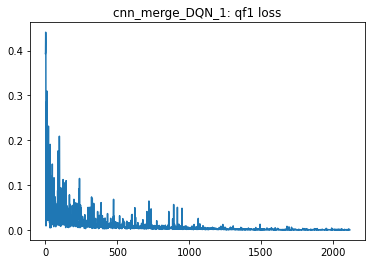

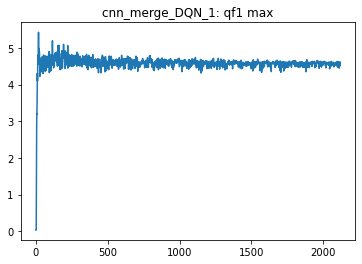

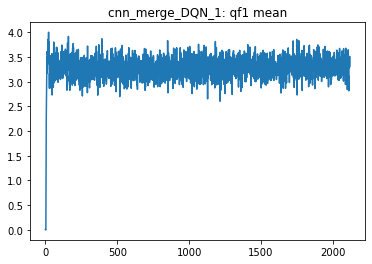

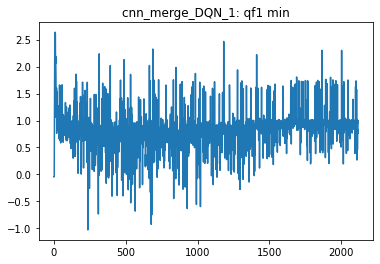

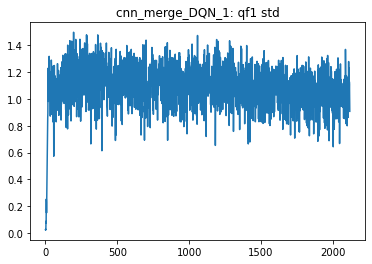

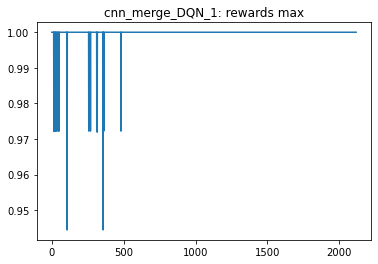

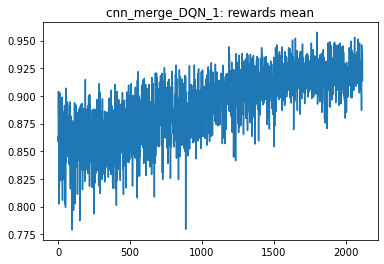

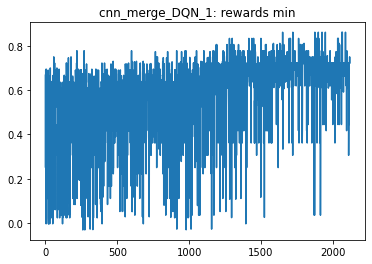

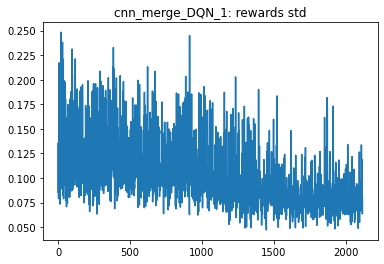

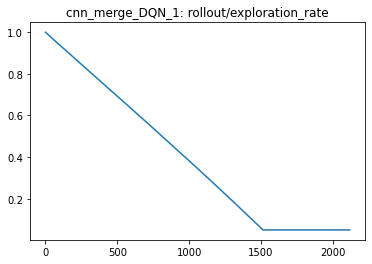

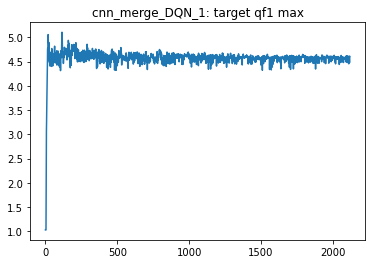

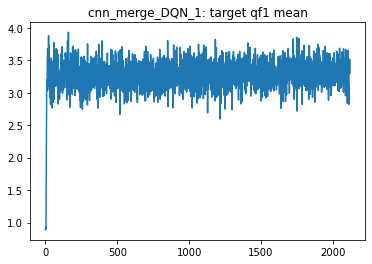

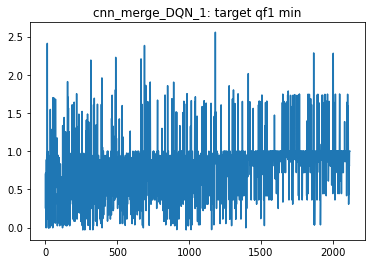

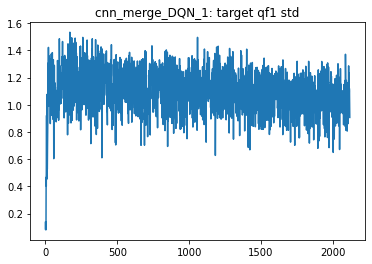

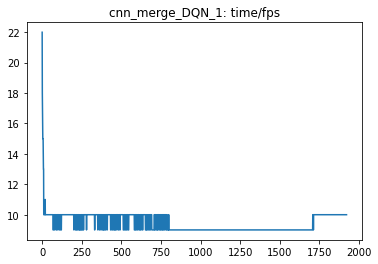

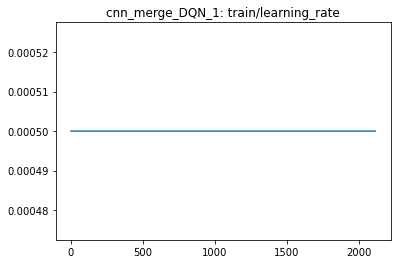

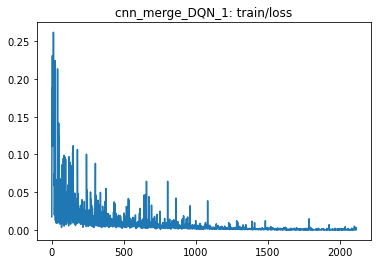

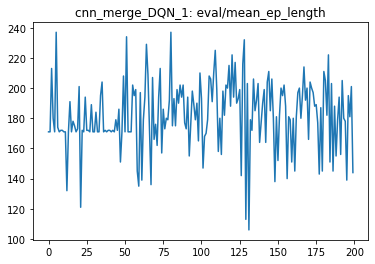

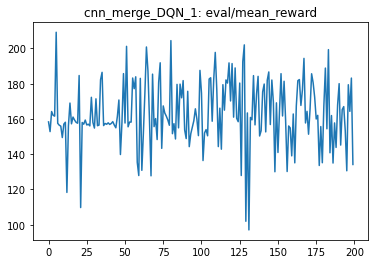

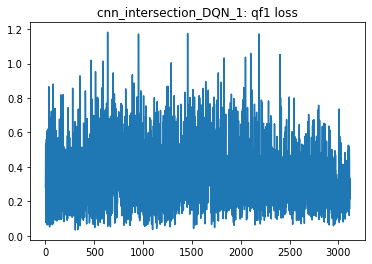

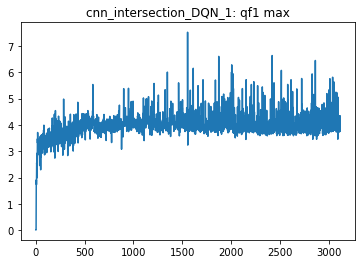

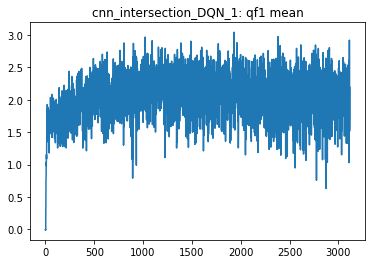

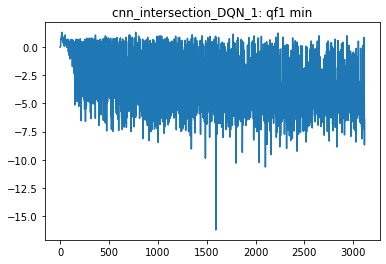

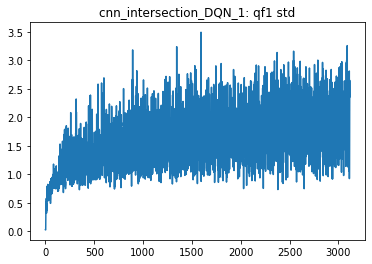

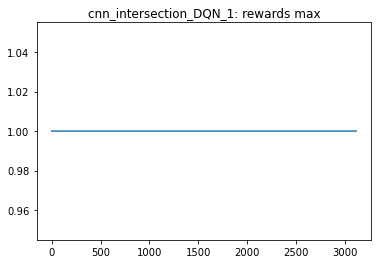

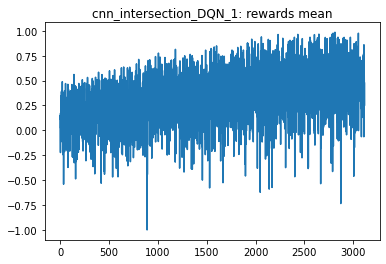

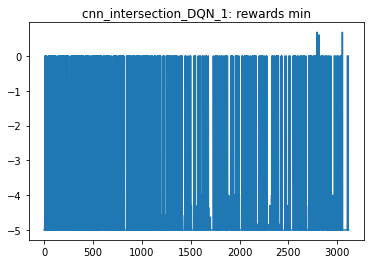

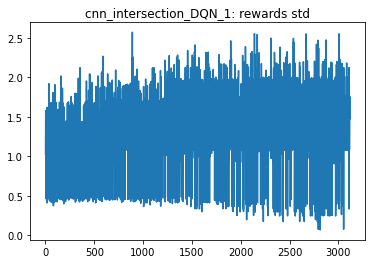

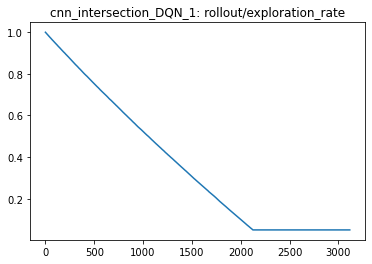

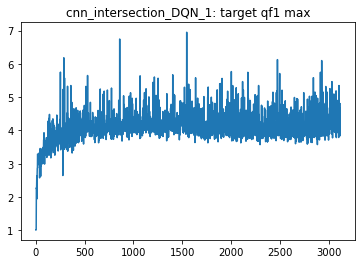

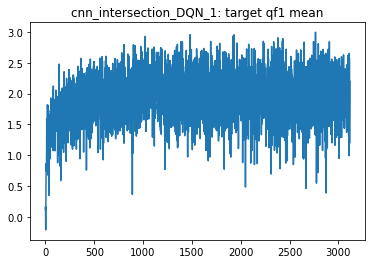

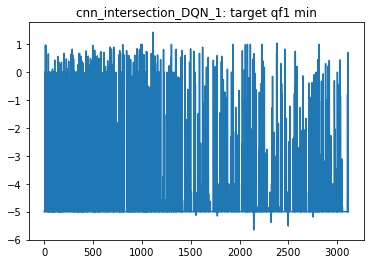

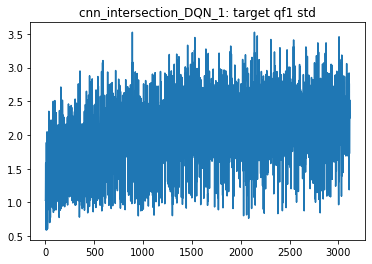

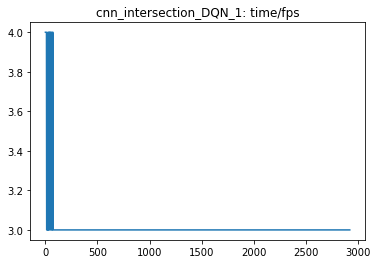

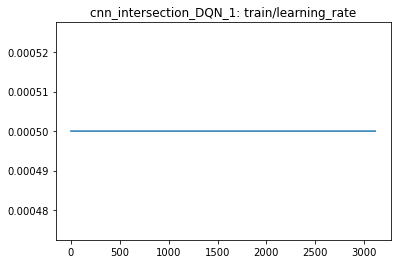

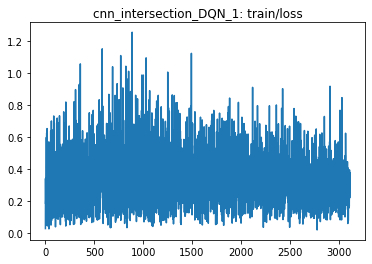

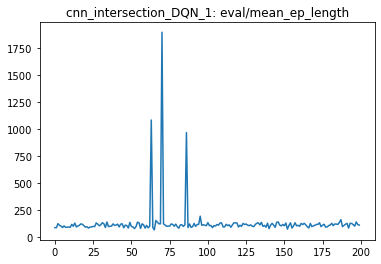

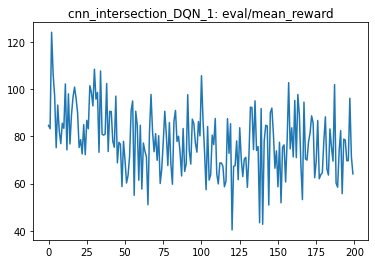

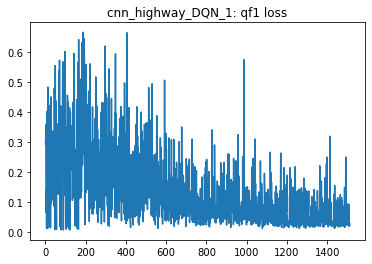

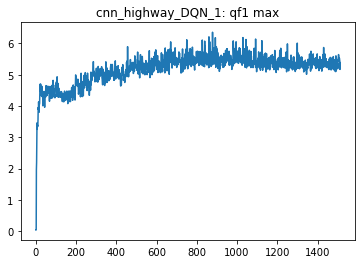

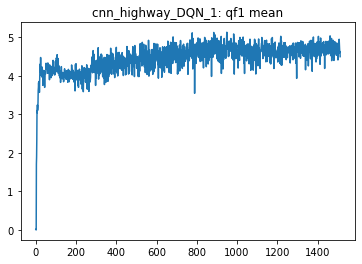

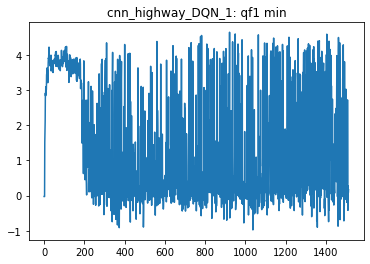

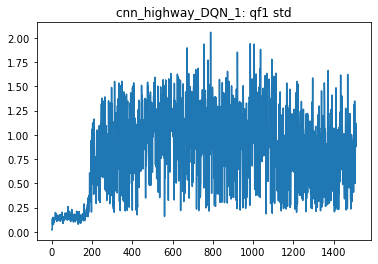

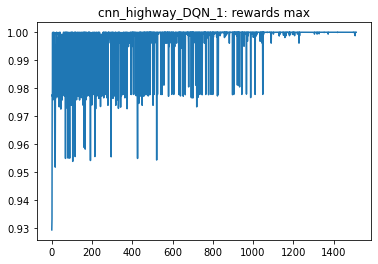

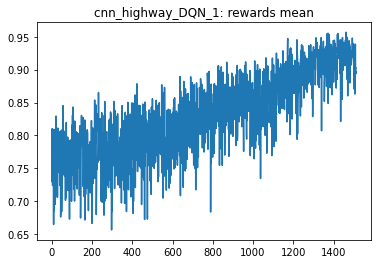

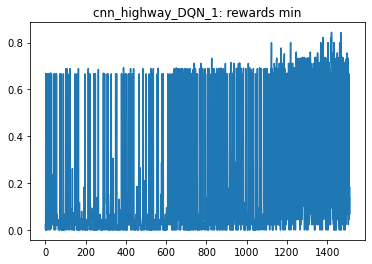

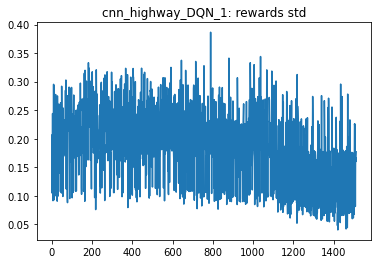

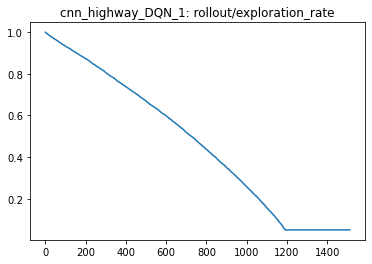

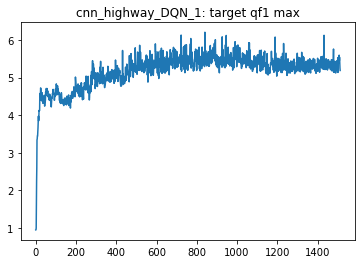

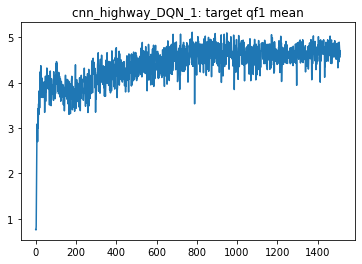

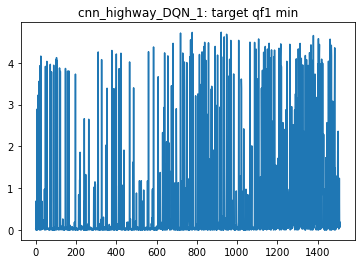

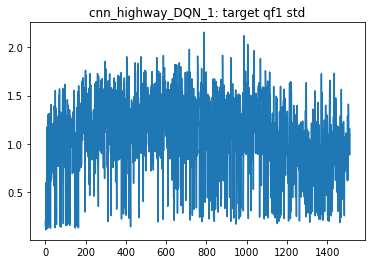

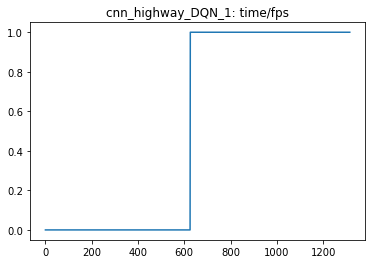

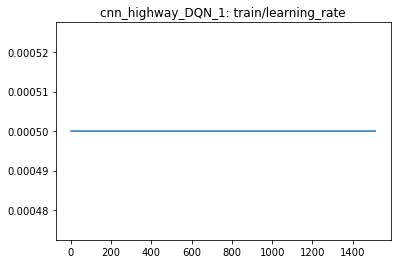

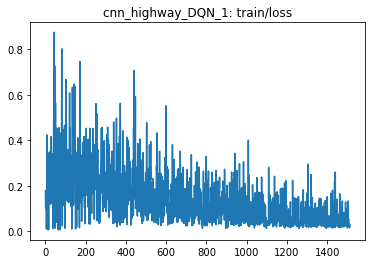

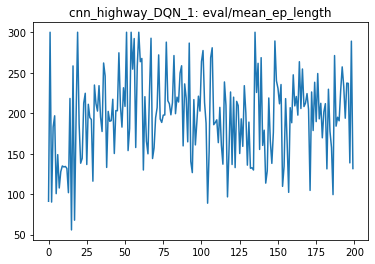

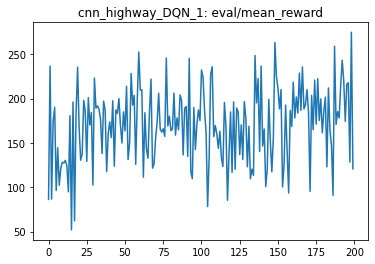

In [47]:
for x in lst:
    name = x.split('/')[-3] + '_' + x.split('/')[-2] + ': '
    plot_tensorboard(x, prefix=name)

In [50]:
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict
import wandb


def plot_wandb(path, prefix=''):
    print('loading: ', path)
    print('prefix: ', prefix)
    
    wandb.init(project="highway-env", reinit=True, settings=wandb.Settings(start_method="fork"))
    wandb.run.name = prefix
    wandb.run.save()
    
    for e in summary_iterator(path):
        to_log = {}
        for v in e.summary.value:
            to_log[v.tag] = v.simple_value
        wandb.log(to_log)

In [51]:
for x in lst:
    name = x.split('/')[-3] + '_' + x.split('/')[-2] + ': '
    plot_wandb(x, prefix=name)

loading:  /home/asap7772/highway-env/data/cnn_roundabout/DQN_1/events.out.tfevents.1649708004.deepthought.39167.0
prefix:  cnn_roundabout_DQN_1: 


wandb: wandb version 0.12.14 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


loading:  /home/asap7772/highway-env/data/cnn_merge/DQN_1/events.out.tfevents.1649707999.deepthought.39065.0
prefix:  cnn_merge_DQN_1: 


eval/mean_ep_length,▆▆▁▃▅▇█▃▄▁█▅▅█▂█▅█▅██▇███▆▆▇▁▃▇▂▇██▃▅▁██
eval/mean_reward,▇▇▁▃▅▇▇▃▄▁▇▅▅▇▁█▅▇▅██▇███▆▆▇▁▃▇▂▇██▃▅▁██
qf1 loss,▄▇▆▂▆█▂▄▄▃▂▅▂▆▆▆▆▃▂▁▂▃▂▂▆▂▄▂▁▂▁▁▁▄▄▂▂▂▁▁
qf1 max,▁▅█▇▇▆▆▆▆▆▆▅▆▆▅▅▅▅▆▅▅▆▅▅▅▅▅▄▆▅▆▅▄▄▅▅▄▄▅▄
qf1 mean,▄▆█▇▇▆█▄▅▃▇▄█▅▆▇▆▃▄▅▆▆▃▄▄▅▄▅▆▂▆▄▁▃▅▅▂▅▂▂
qf1 min,█▅▅▃▅▂▄▄▃▂▄▄▄▄▄▅▄▃▂▂▂▄▃▄▆▄▃▅▄▃▇▃▃▄▃▄▃▃▂▁
qf1 std,▁▅▆▇▅▆▅▆▇█▅▇▅▆▅▄▆▇█▇▆▅▇▆▅▅▇▆▆▇▄▇▇▇▅▅█▆█▇
rewards max,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
rewards mean,▄▁▃▄▃▂▃▅▁▂▄▃▅▄▄▄▄▄▃▄▂▆▅▆▅▅▄▆█▇▆▄▅▆▅▇█▇▇▆
rewards min,█▂▂██▂██▂▂▁████▂▂█▁▂▂███▂█▂████▂▂▂▂███▂▂
rewards std,▁█▅▂▂▆▂▂▅▆▇▁▂▁▁▆▅▂▆▅█▁▁▂▆▁▆▁▁▁▁▆▆▆▆▂▁▁▆▆


wandb: wandb version 0.12.14 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


loading:  /home/asap7772/highway-env/data/cnn_intersection/DQN_1/events.out.tfevents.1649708013.deepthought.39267.0
prefix:  cnn_intersection_DQN_1: 


eval/mean_ep_length,▄█▄▄▁▄▅▆▄▄█▆▂▂▃▅▄▅▅▅▃▅▃▆▅▇▄▆▆▅▅▅▆▇▆▂▇▅▅▂
eval/mean_reward,▄█▄▄▁▄▅▆▄▅▇▆▂▂▄▅▄▅▆▅▃▄▃▆▅▇▅▆▆▅▅▄▆▇▆▃▇▄▅▃
qf1 loss,▄▄▅█▃▅▄▅▃▃▇▂▃▂▁▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
qf1 max,▄▅▄▇▁█▄▃▂▆▄▄▃▂▃▃▅▅▅▂▅▄▄▃▂▅▃▄▁▃▃▃▃▄▃▃▃▃▃▃
qf1 mean,▇▇▅▃▃▄▆▃▃▆▆▄▆▅▅▄▆▅▄▂▄██▆▄▁▅▆▂▃▄▅▄▄▇█▅▆█▆
qf1 min,▅▄▄▁▄▄▄▄▄▄▅▄█▅▄▁▁▄▄▄▅▅▄▅▅▄▄▅▄▅▅▅▅▄▅▅▅▅█▅
qf1 std,▄▃▅▇▅▆▅█▅▃▄▄▁▃▅▅▇▃▃▆▅▂▂▄▄▆▄▅▃▄▄▁▃▆▃▂▃▅▁▆
rewards max,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
rewards mean,▄▃▃▁▃▃▄▃▅▅▃▃▃▅▆▄▅▃▄▅▅▅▆▇▆▇▆▆▅▅▆▅▇▅▇▇▆█▆█
rewards min,▆▇▆▁▆▆▇▄▆▇▄▆▆▆▆▁▃▇▇▇▇▆▇▇▇█▇▆▇▅▇▇▇▇▇▇▇▇▇▇
rewards std,▃▄▅█▄▄▄▅▃▃▆▄▅▄▃▇▅▄▃▄▃▄▃▃▃▁▃▃▃▄▂▃▂▄▂▂▃▂▃▂


wandb: wandb version 0.12.14 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


loading:  /home/asap7772/highway-env/data/cnn_highway/DQN_1/events.out.tfevents.1649707993.deepthought.38961.0
prefix:  cnn_highway_DQN_1: 


eval/mean_ep_length,▁▂▄▃▂▂▆▂▄▁▂▅▁▆▄▄▁▁▅▄▃▃▂▅▃▃▅▃▃▄▃▅▅▅▅▂▄█▅▄
eval/mean_reward,▅▄█▆▄▆▇▅▆▃▁▇▁▇▃▅▁▂▇▃▆▅▁▆▃▂▆▄▅▅▄█▇▇▅▂▂█▄▂
qf1 loss,▄▃▁▂▅▄█▅▁▃▅▃▃▆▂▂▂▄▄▃▄▅▂▃▃▄▃▃▃▄▃▄▅▅▂▄▅▃▂▄
qf1 max,▁▂▁▃▃▄▃▄▄▄▃▄▄▄▃▃▃▃▄▃▄▃▄▃▃▆▃▃█▃▄▅▅▄▄▄▃▃▄▄
qf1 mean,▁▃▅▂▆▆▄▂▆▇▇▄▇▆▆▅▆▁▂▆█▇█▆▆▇▆▄█▅▅▆▆▆▃█▃▄▇▆
qf1 min,██▇▆▇▇▅▃█▇█▃▄█▄█▅▁▃▄██▇▄▄▆▅▄█▇▅▄▄▃▄▇▅▄▇▄
qf1 std,▁▂▂▃▃▃▆█▃▃▃▆▅▃▅▂▄█▇▅▃▃▄▆▆▄▅▇▃▃▅▅▅▆▇▂▆▆▄▅
rewards max,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
rewards mean,▃▄▅▄▄▄▃▁▆▅▄▅▄▅▆▇▅▅▃▆▆▆█▆▅▇▆▅▇▇▆█▆▅▅▇▄▅█▅
rewards min,▁▁█▁▁▁▁▁█▁▁▁▁▁▁█▁▁▁▁▁▁█▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁█▁
rewards std,▅▄▁▄▅▄▇█▂▄▅▄▆▆▄▁▄▅▇▄▅▆▁▆▇▄▆▇▄▄▆▄▆▇▆▄▇▆▁▇


wandb: wandb version 0.12.14 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.
